In [34]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [35]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [36]:
#Part 1
# Drop all the null value in the worksheet:
dfLE= dfLE.dropna(axis=0, inplace=False)
# GDP per Capita caluculation:
dfLE["GDP_per_Capita"] = (dfLE["GDP"]/ dfLE["Population"])
#Print the new column:
dfLE[["Country","GDP_per_Capita"]].sample(10)

,Country,GDP_per_Capita
133,Poland,4820.882331
166,SyrianArabRepublic,1001.753752
134,Portugal,10749.159279
53,ElSalvador,3276.183006
77,Indonesia,2341.243997
26,Burundi,117.466394
129,PapuaNewGuinea,750.075931
110,Mongolia,2113.183970
28,Cambodia,508.830482
61,Gabon,5471.491381


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [37]:
def bigGraph(df_in, columnName, histR, pmfR):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,histR))
    pmf = thinkstats2.Pmf(round(data, pmfR))
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sijiahao/BSIP_Assignment_2_Students/thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


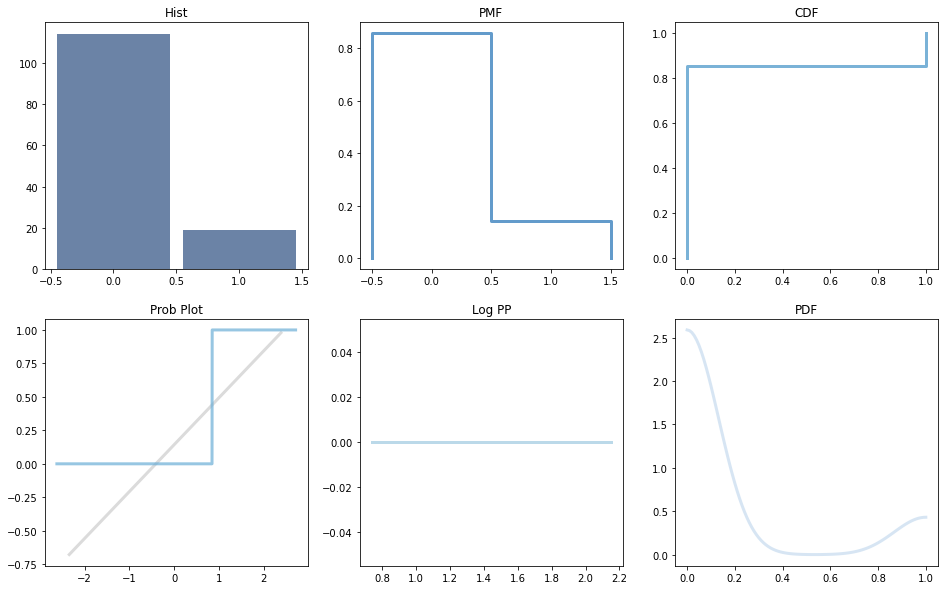

In [38]:
# Draw Graphs for isDeveloped:

bigGraph(dfLE,"isDeveloped", 0, 0)

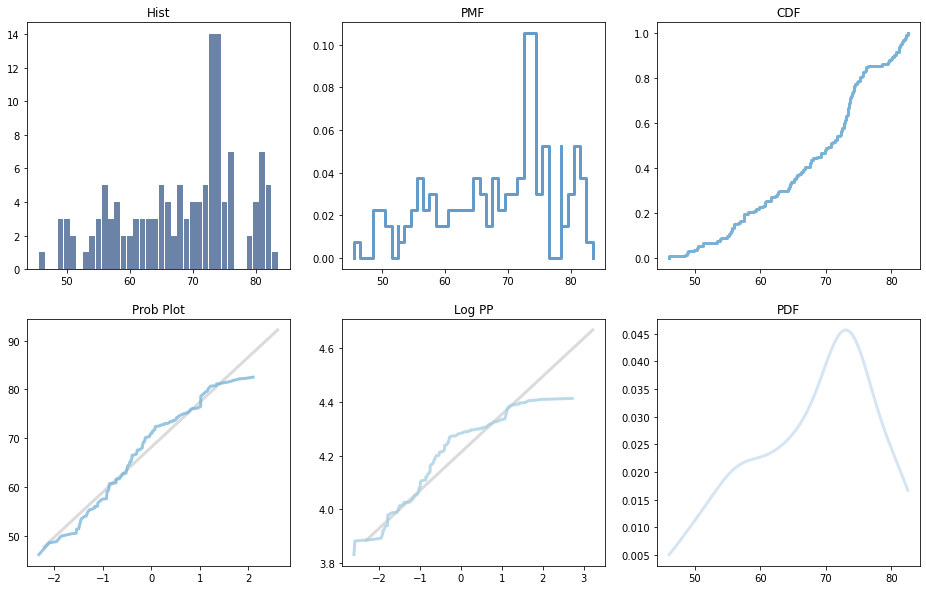

In [39]:
# Draw Graphs for Lifeexpectancy:

bigGraph(dfLE,"Lifeexpectancy", 0, 0)

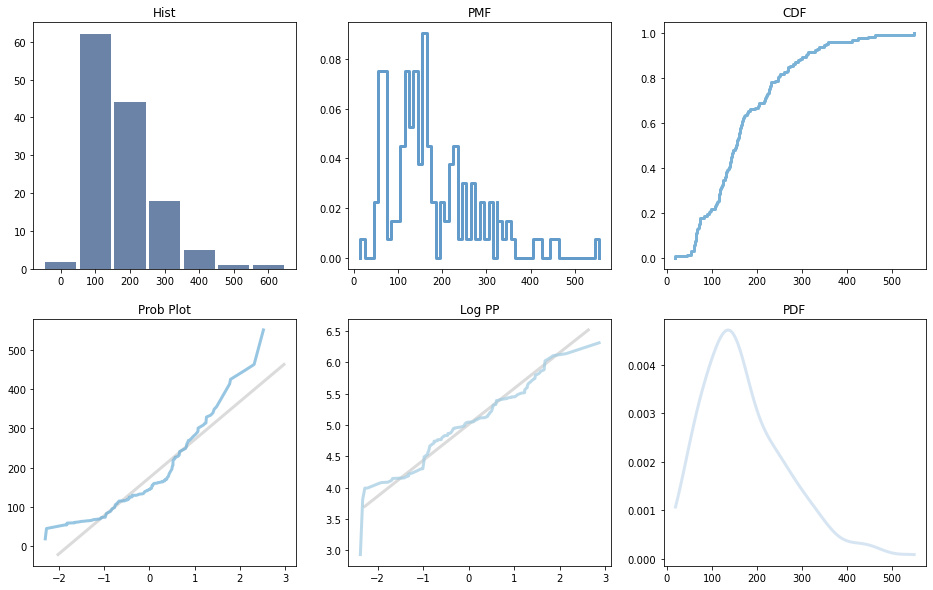

In [40]:
#Draw Graphs for AdultMortality

bigGraph(dfLE,"AdultMortality", -2, -1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sijiahao/BSIP_Assignment_2_Students/thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


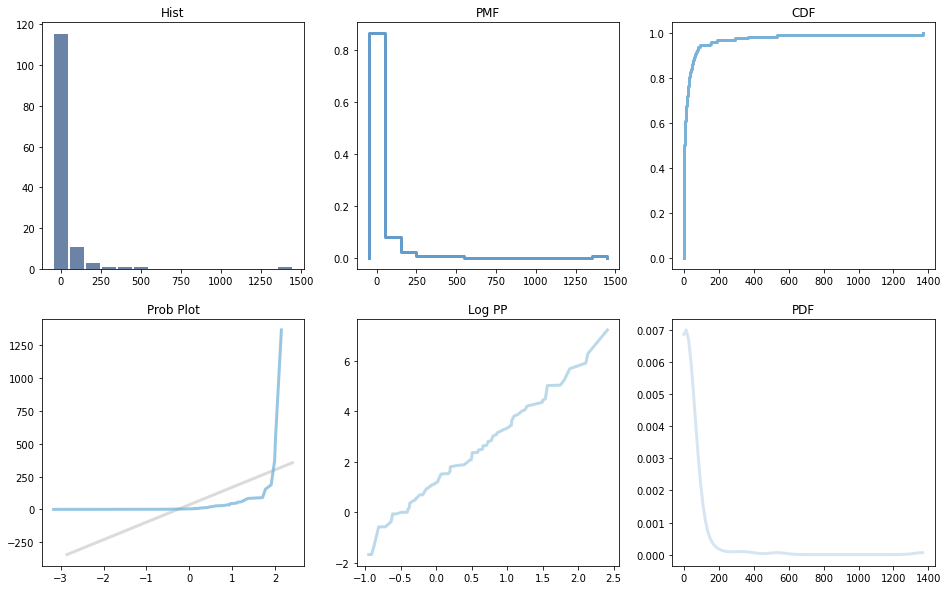

In [41]:
#Draw Graphs for infantdeaths

bigGraph(dfLE,"infantdeaths", -2, -2)

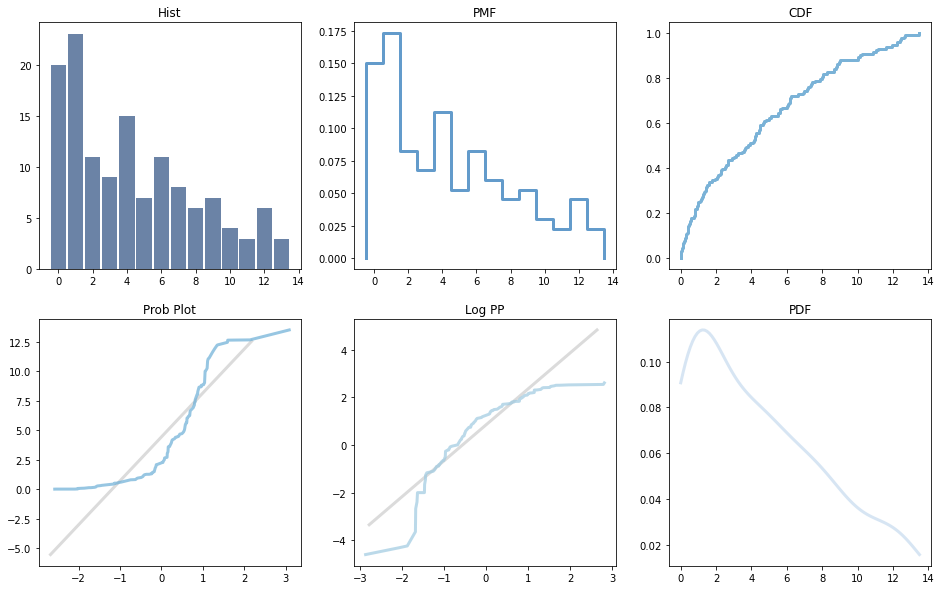

In [42]:
#Draw Graphs for Alcohol

bigGraph(dfLE,"Alcohol", 0, 0)

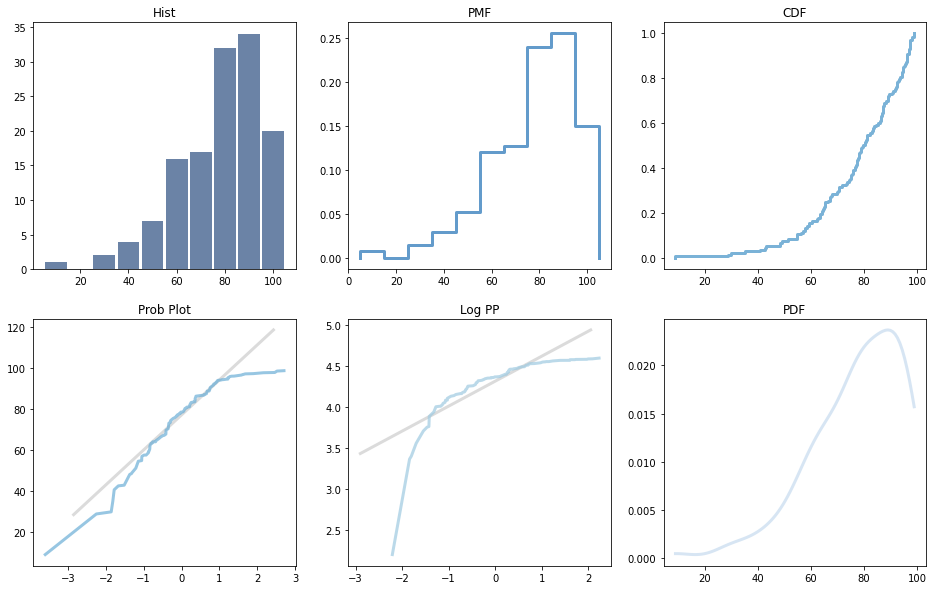

In [43]:
#Draw Graphs for HepatitisB

bigGraph(dfLE,"HepatitisB", -1, -1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sijiahao/BSIP_Assignment_2_Students/thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


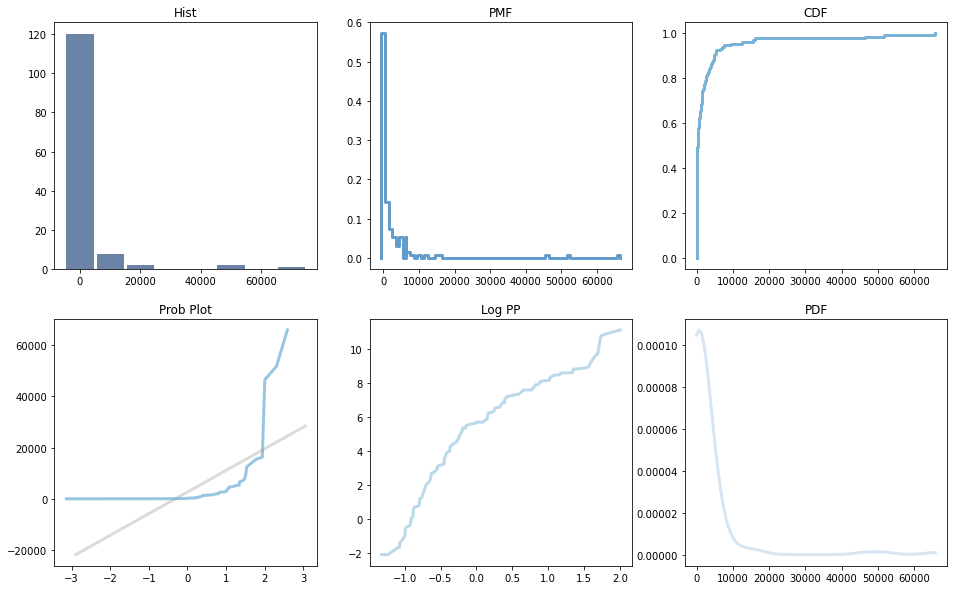

In [44]:
#Draw Graphs for Measles

bigGraph(dfLE,"Measles", -4, -3)

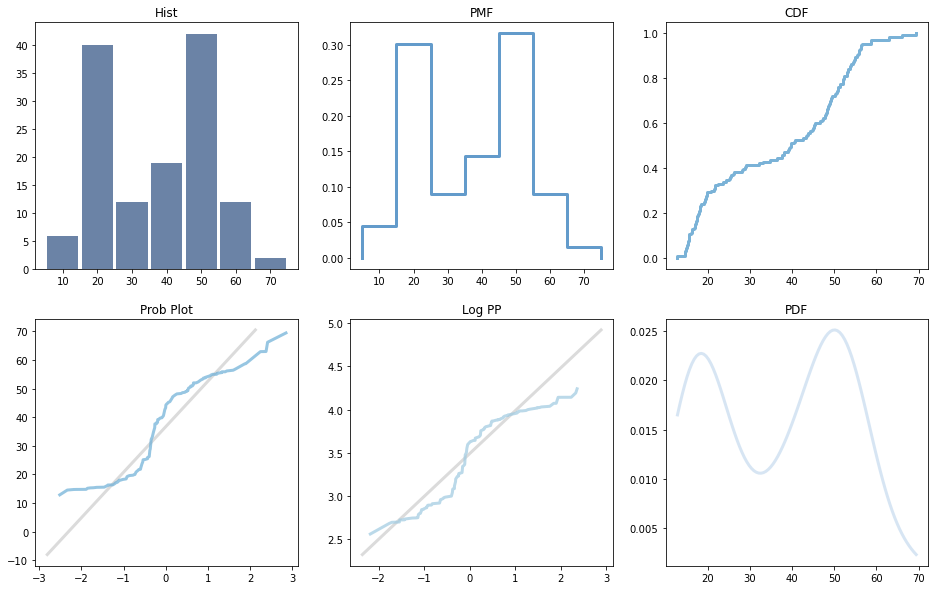

In [45]:
#Draw Graphs for BMI

bigGraph(dfLE,"BMI", -1, -1)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sijiahao/BSIP_Assignment_2_Students/thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


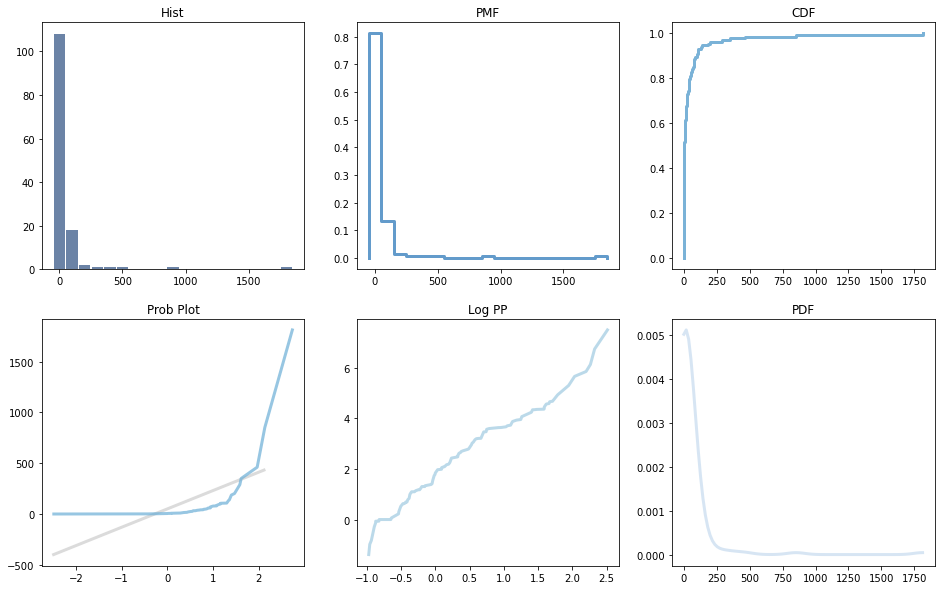

In [46]:
#Draw Graphs for under-fivedeaths

bigGraph(dfLE,"under-fivedeaths", -2, -2)

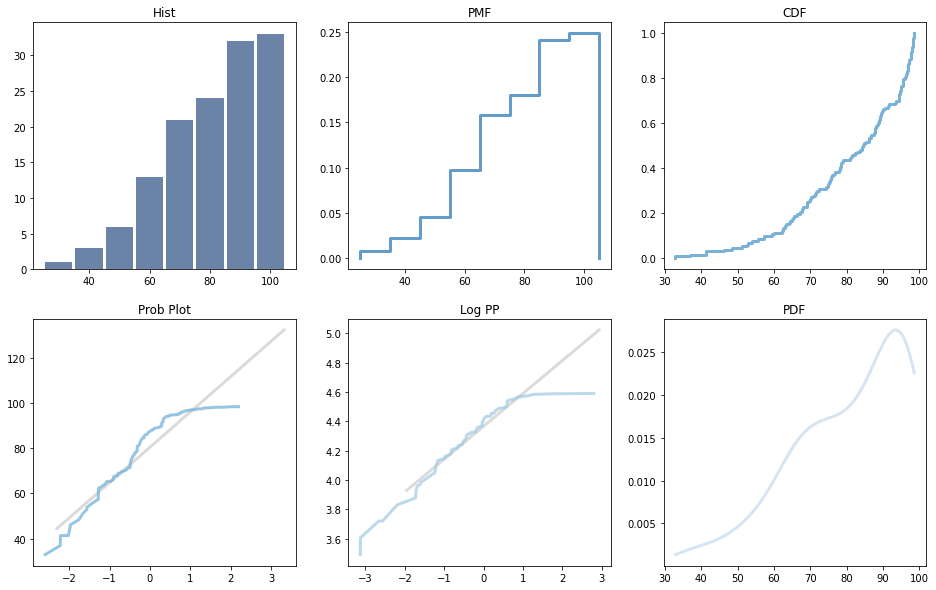

In [47]:
#Draw Graphs for Polio

bigGraph(dfLE,"Polio", -1, -1)

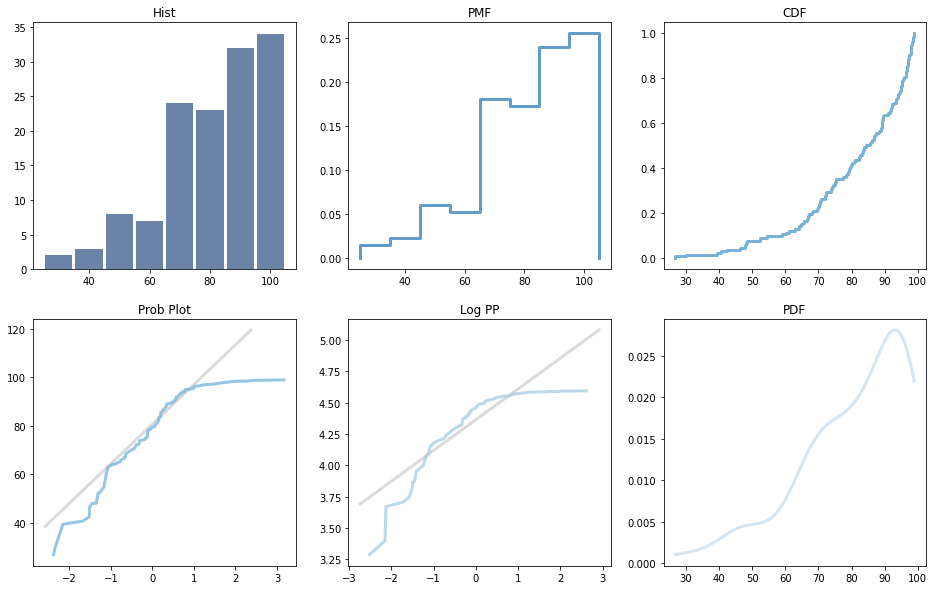

In [48]:
#Draw Graphs for Diphtheria

bigGraph(dfLE,"Diphtheria", -1, -1)

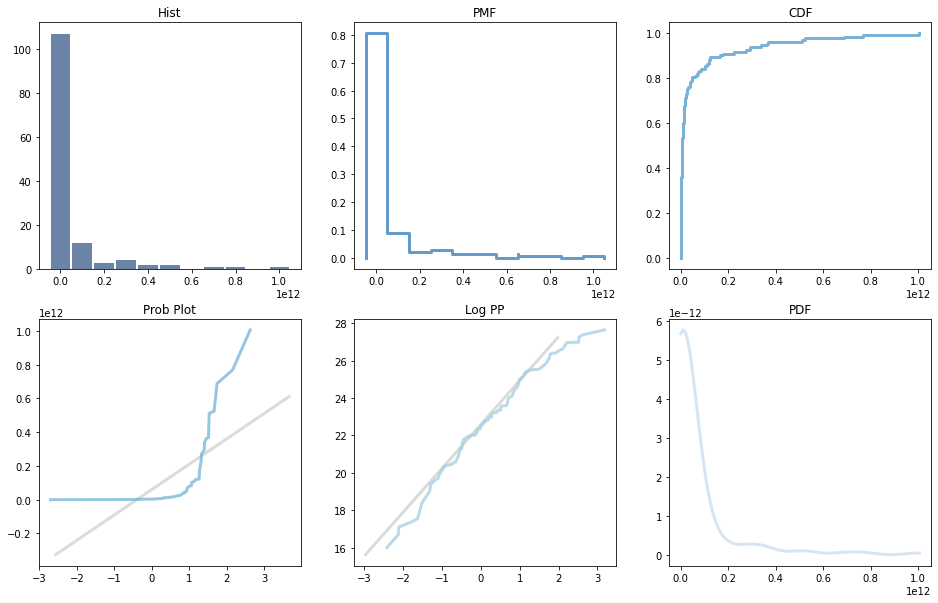

In [49]:
#Draw Graphs for GDP

bigGraph(dfLE,"GDP", -11, -11)

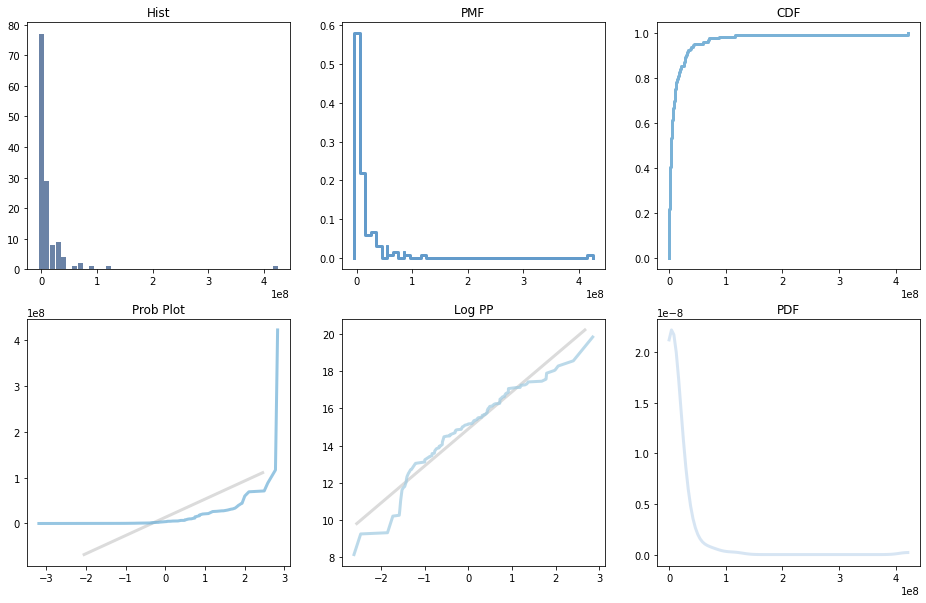

In [50]:
#Draw Graphs for Population

bigGraph(dfLE,"Population", -7, -7)

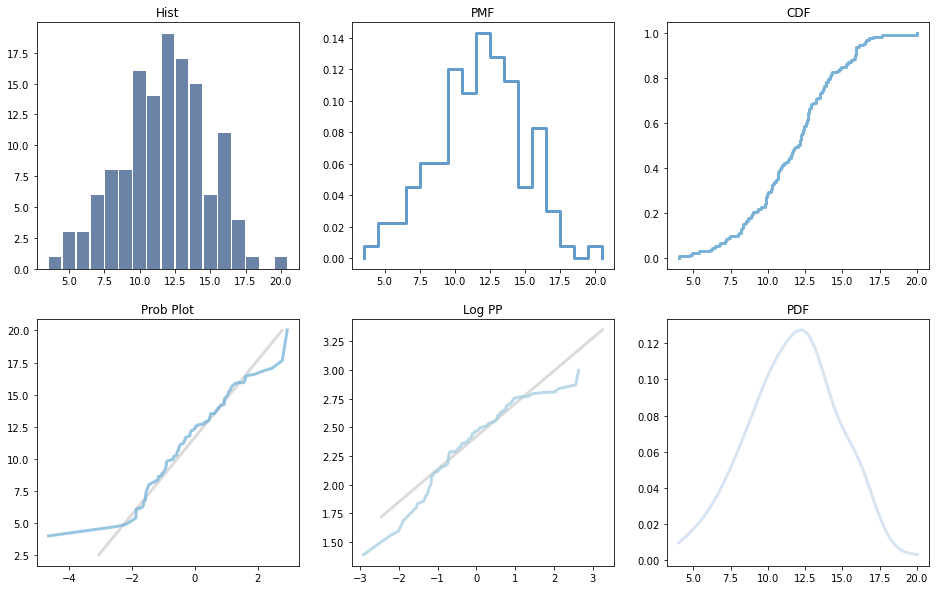

In [51]:
#Draw Graphs for Schooling

bigGraph(dfLE,"Schooling", 0, 0)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [52]:
#Analytical for Schooling
histS = thinkstats2.Hist(round(dfLE["Schooling"]))
pmfS = thinkstats2.Pmf(round(dfLE["Schooling"]))
cdfS = thinkstats2.Cdf(dfLE["Schooling"])

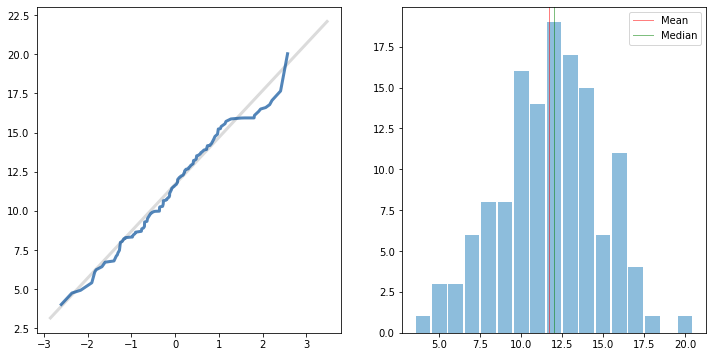

In [53]:
#Make the graph with thinkplot
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])
thinkplot.SubPlot(2)
thinkplot.Hist(histS)
thinkplot.axvline(dfLE["Schooling"].mean(), color="Red", label="Mean")
thinkplot.axvline(dfLE["Schooling"].median(), color="Green", label="Median")
thinkplot.Config()

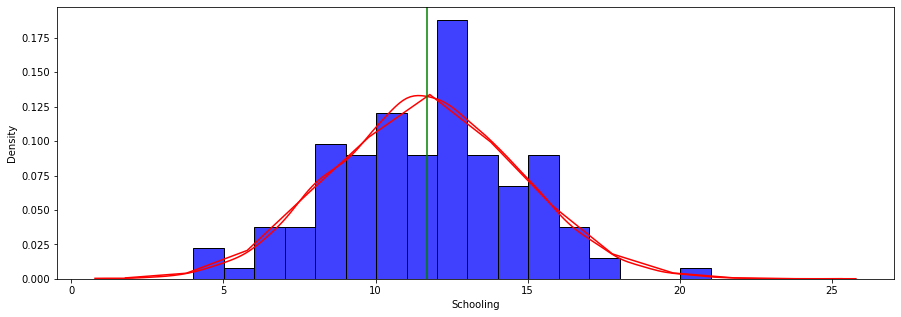

In [54]:
# Graph with Seaborn: 

mu_S = dfLE["Schooling"].mean()
sigma_S = dfLE["Schooling"].std()
norm_S = ss.norm(mu_S, sigma_S)
sns.histplot(data=norm_S.rvs(10000), binwidth=2, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=dfLE["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(mu_S, color="green")

In [55]:
k2, p = ss.normaltest(dfLE["Schooling"])
p

0.8061408621435778

p value for Schooling:

Since our p valuse for schooling is 0.81, which is greater than 0.05, the data is normal.

In [56]:
# Schooling for Canada
countryC = dfLE.index[dfLE["Country"] == "Canada"]
schoolingC = dfLE.loc[countryC.values[0], "Schooling"]
schoolingC



15.875

In [57]:
# Schooling level percentage for Canada within 1 year:

x = (norm_S.cdf(15.875+1)-norm_S.cdf(15.875-1))*100
print("The predicted schooling level percentage for Canada within 1 year is:", round(x, 2),"%")

The predicted schooling level percentage for Canada within 1 year is: 10.25 %


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

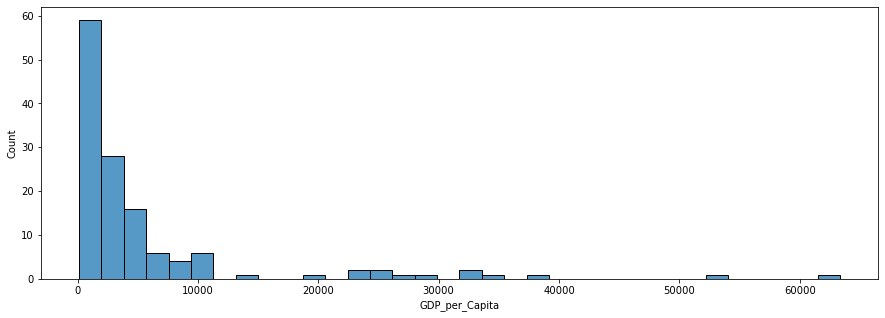

In [58]:
# Hist plot for the data:

sns.histplot(dfLE["GDP_per_Capita"])

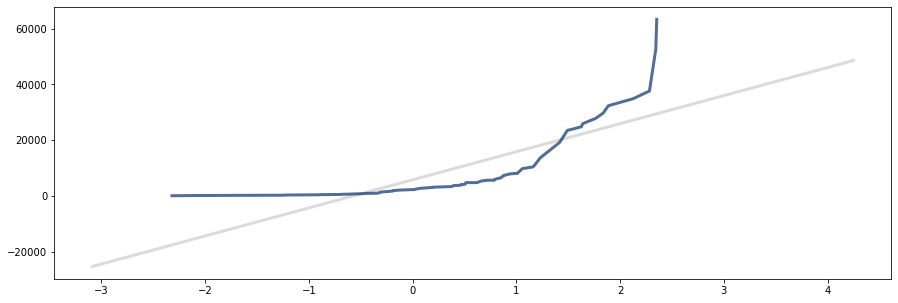

In [59]:
# Log Normal Test
thinkstats2.NormalProbabilityPlot(dfLE["GDP_per_Capita"])

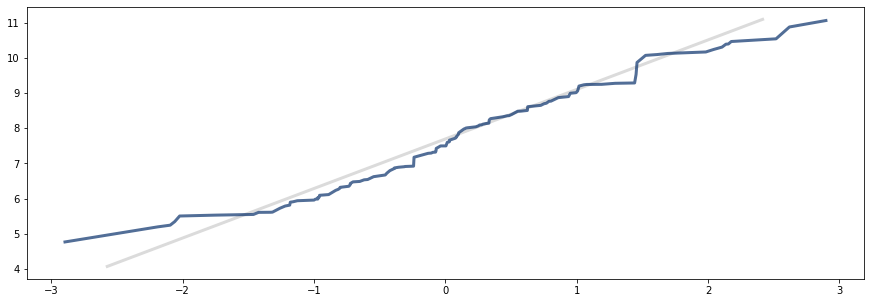

In [60]:
#Log normal distritubtion:
thinkstats2.NormalProbabilityPlot(np.log(dfLE["GDP_per_Capita"]))

### Conclusion:
### The emperical data is lined up with the analytical distribution pretty close. The GDP per Capita at $0 and above $50000 is not affecting much on the whole distribution. It is log normal distribution. The log normal distribution model is pretty accurate to predict the reality. 

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [65]:
# Filter outliers
dfLE = dfLE[dfLE["AdultMortality"] < 280]
dfLE = dfLE[dfLE["Measles"] < 3000]
dfLE = dfLE[dfLE["GDP"] < 10e+10]

# Spliting 2 groups as [developedC] and [notdevelopedC]:
developedC = (dfLE[dfLE["isDeveloped"]== 1])
notdevelopedC = (dfLE[dfLE["isDeveloped"]== 0])

### There are outliers in AdultMortality, Measles, and GDP at higher ends, which are huge jumps after 75% percentile.

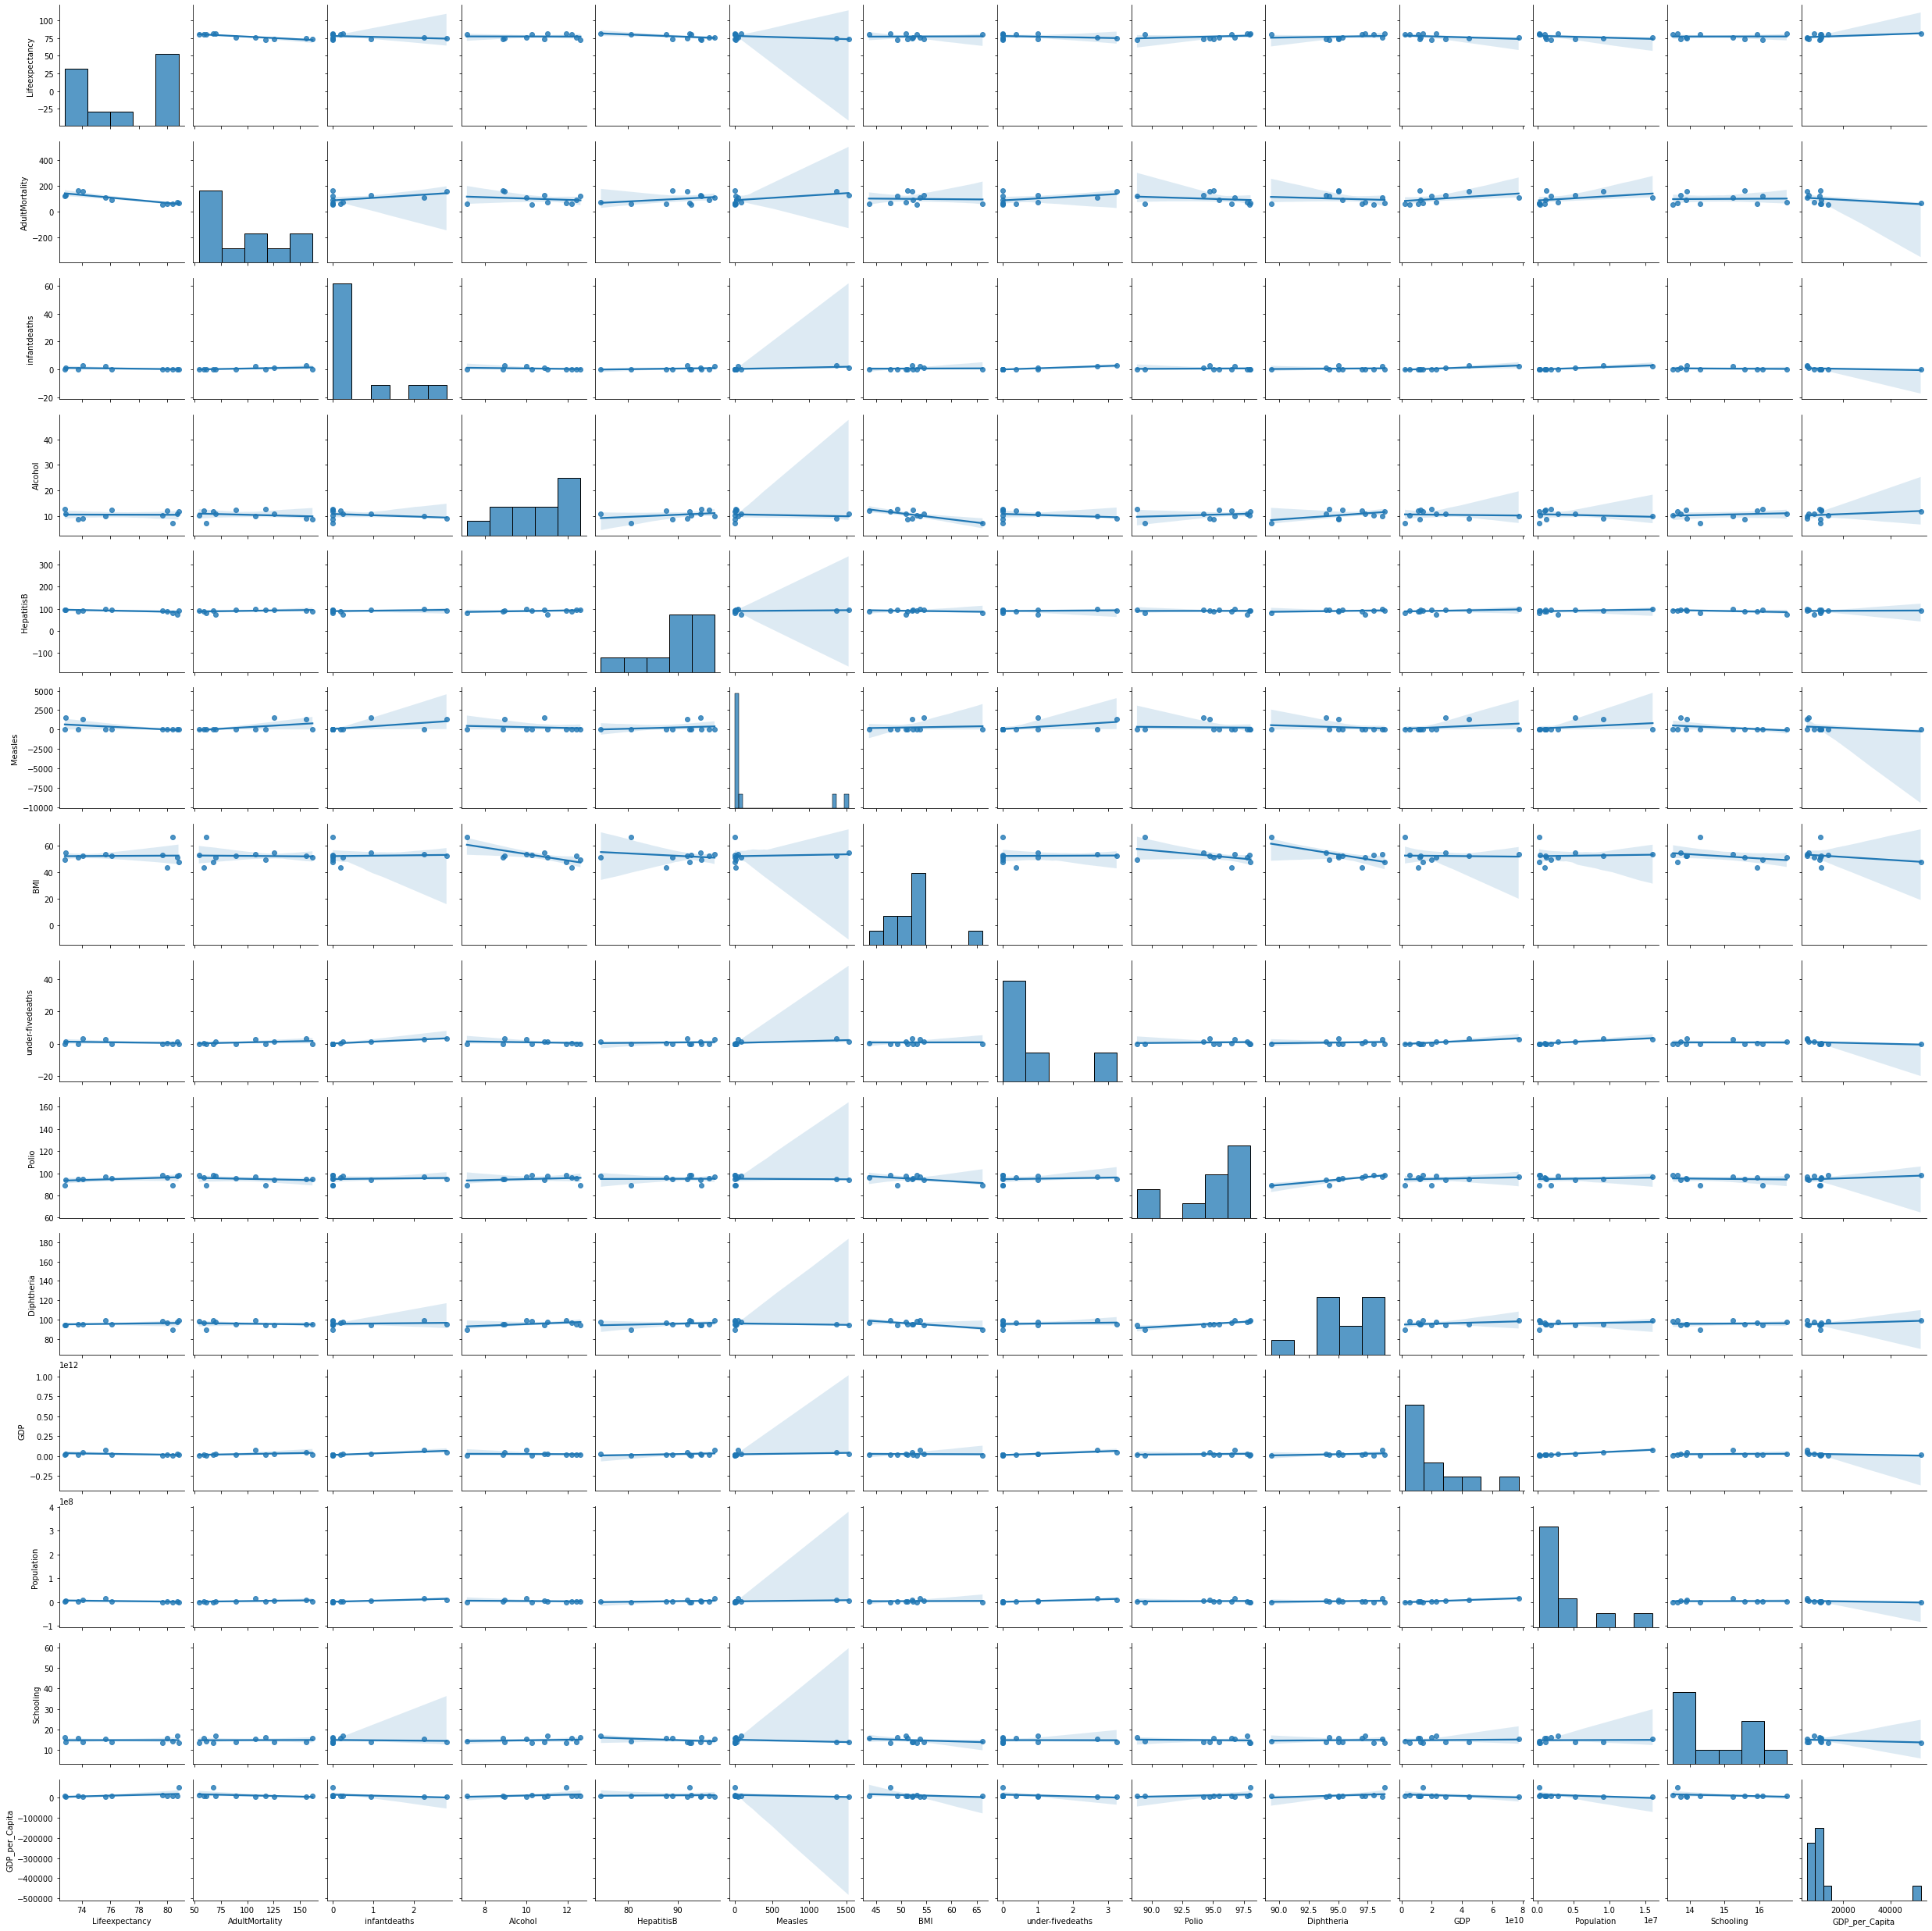

In [66]:
# Visualization correlations for Developed contries:
# Since the ["isDeveloped"] column is not needed in ploting the correlation here, we clean the data by dropping this column.

developedC = developedC.drop(columns=["isDeveloped"])
sns.pairplot(developedC, dropna=True, kind="reg")
plt.show()

In [75]:
# Filter more outliers for not developed countries:

notdevelopedC = notdevelopedC[notdevelopedC["GDP"] < 7e+9]
notdevelopedC = notdevelopedC[notdevelopedC["GDP_per_Capita"] < 4000]


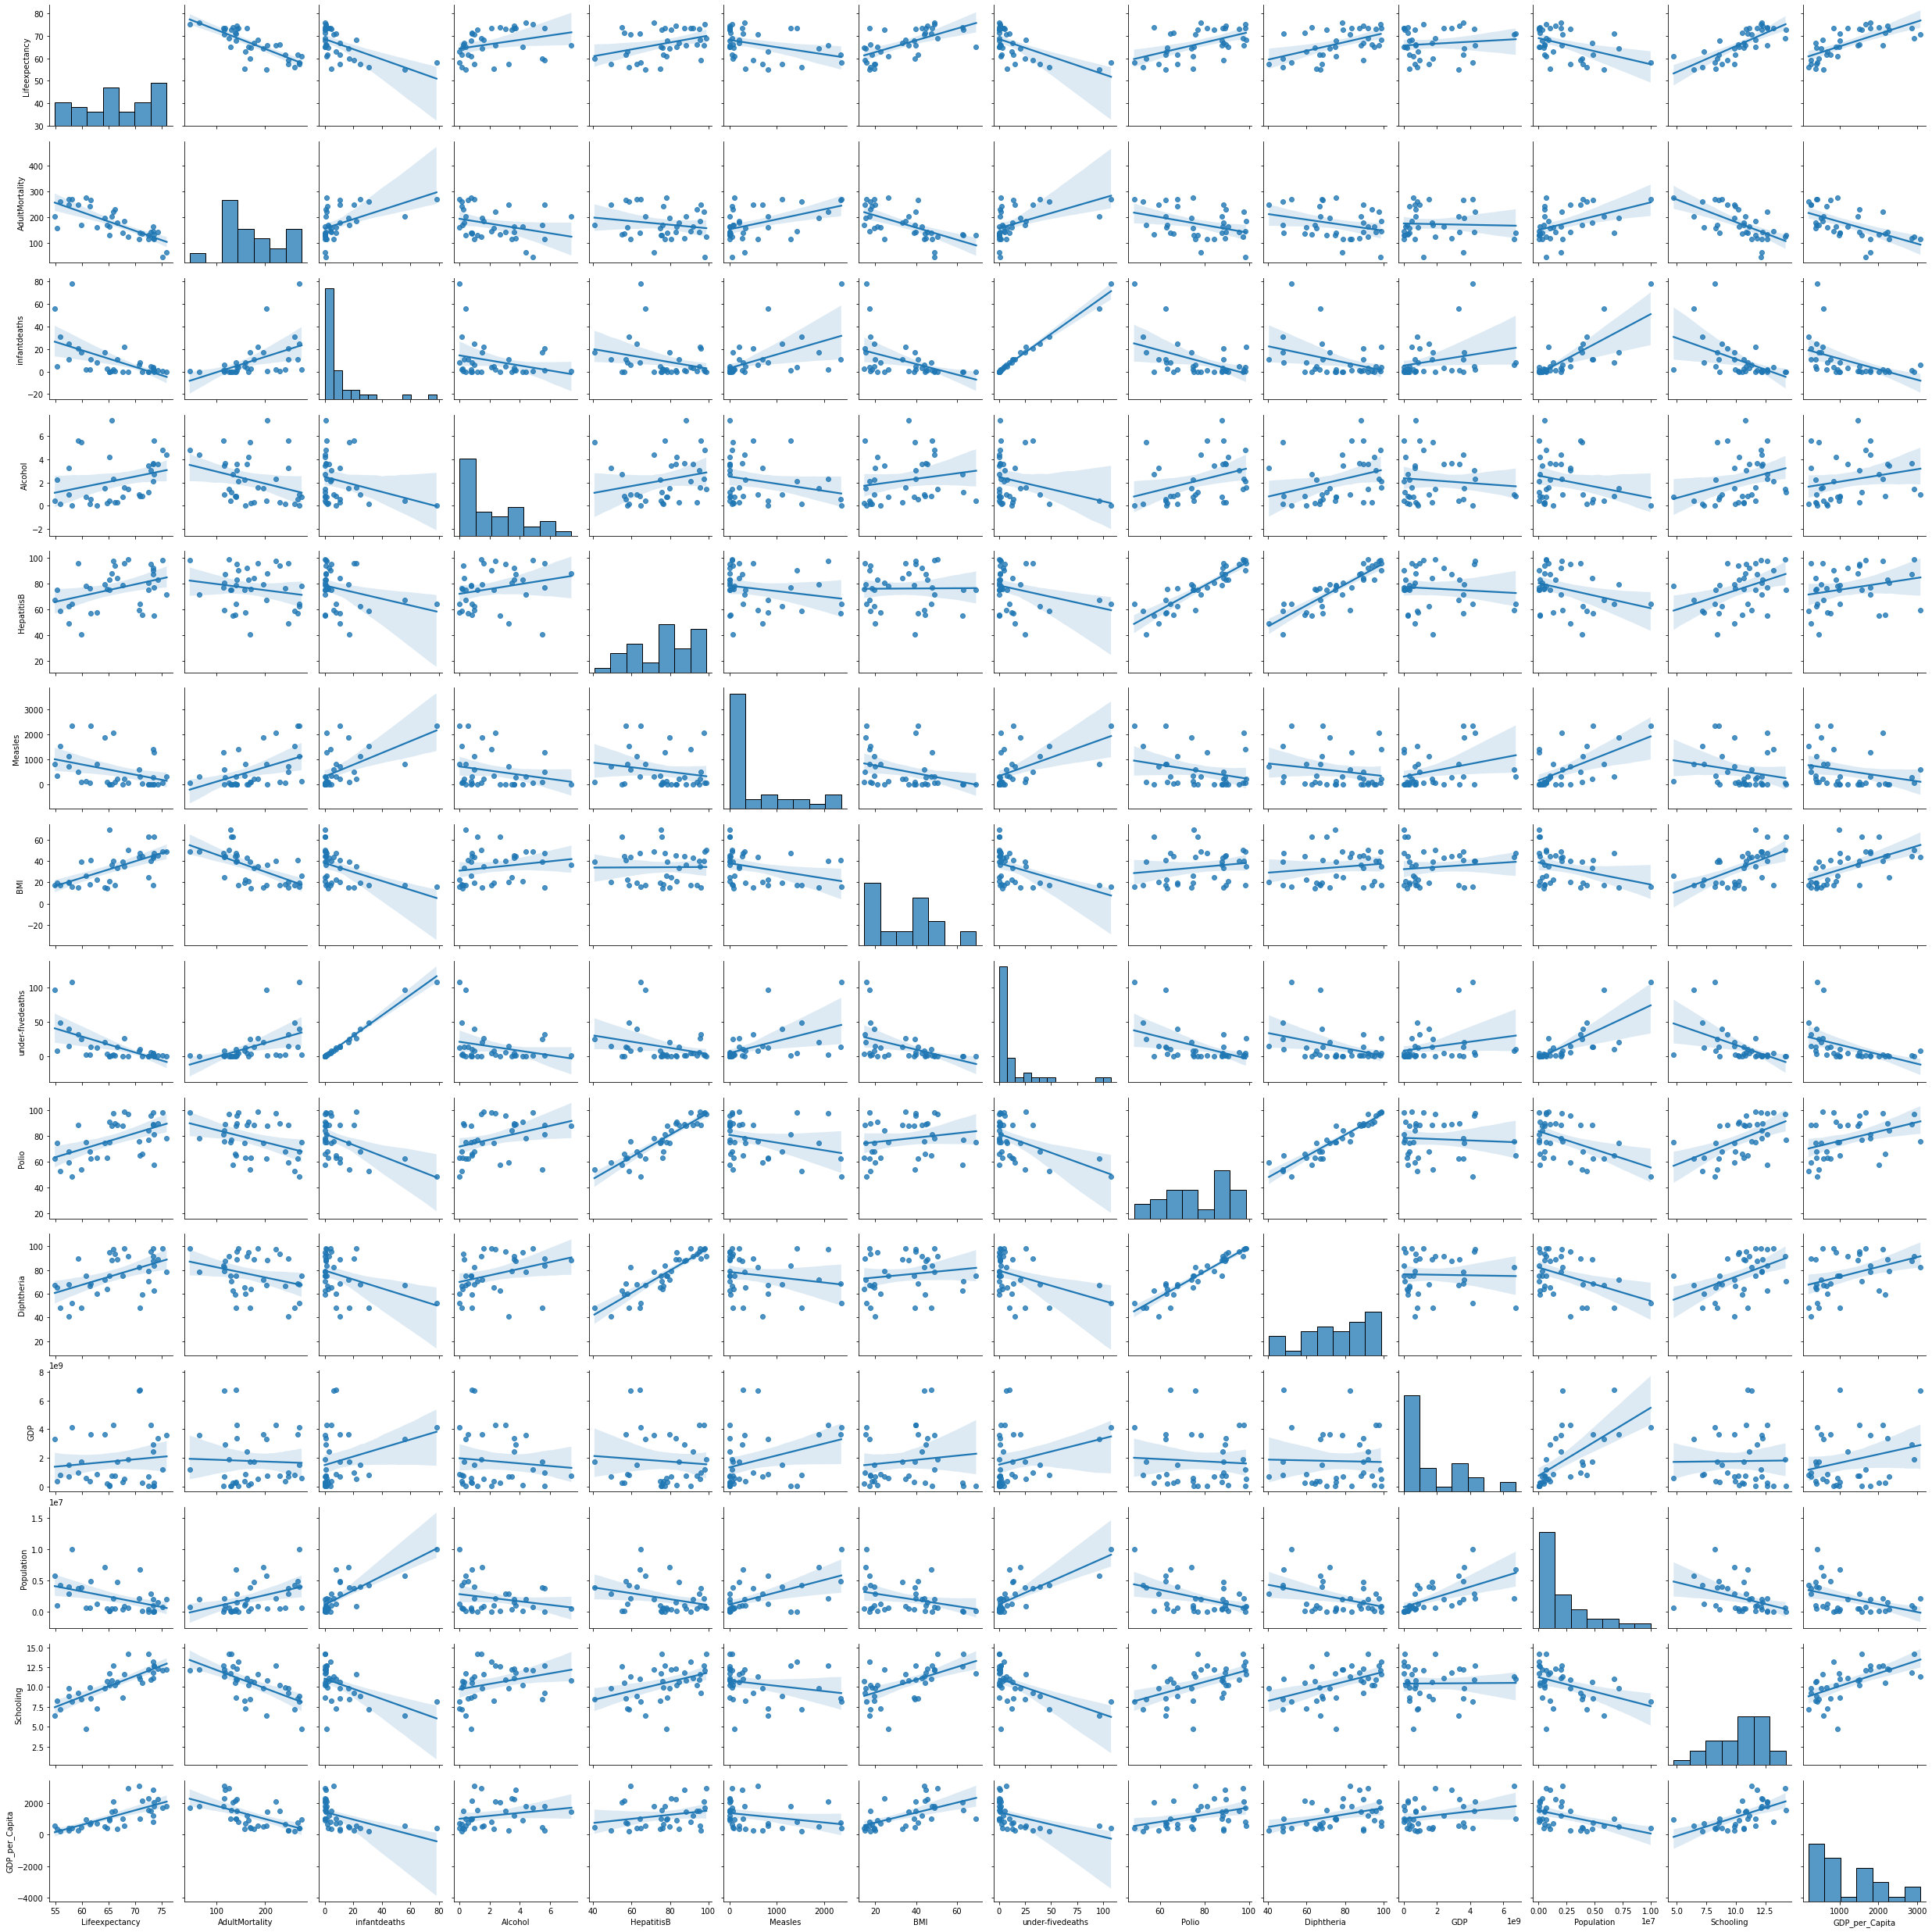

In [76]:
# Visualization correlations for NotDeveloped contries:
# Since the ["isDeveloped"] column is not needed in ploting the correlation here, we clean the data by dropping this column.

notdevelopedC = notdevelopedC.drop(columns=["isDeveloped"])
sns.pairplot(notdevelopedC, dropna=True, kind="reg")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [154]:
#Create correlation dataframe
developedC_Co = developedC.corr()
developedC_Co

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
Lifeexpectancy,1.000000,-0.884382,-0.401668,-0.018618,-0.580872,-0.521703,0.032735,-0.315454,0.396931,0.220801,-0.401711,-0.400019,0.012977,0.455821
AdultMortality,-0.884382,1.000000,0.511548,-0.224885,0.350515,0.538773,-0.042577,0.452188,-0.233800,-0.171337,0.421838,0.421918,0.035620,-0.354342
infantdeaths,-0.401668,0.511548,1.000000,-0.291843,0.295779,0.616319,0.058950,0.982528,0.111227,0.136674,0.860850,0.897091,-0.140017,-0.361874
Alcohol,-0.018618,-0.224885,-0.291843,1.000000,0.338710,-0.165453,-0.761229,-0.265990,0.240881,0.519828,-0.072350,-0.185373,0.186928,0.282675
HepatitisB,-0.580872,0.350515,0.295779,0.338710,1.000000,0.204593,-0.232407,0.157673,0.019499,0.266772,0.369154,0.353092,-0.468892,0.076545
Measles,-0.521703,0.538773,0.616319,-0.165453,0.204593,1.000000,0.100590,0.569585,-0.066122,-0.211099,0.330124,0.372213,-0.384646,-0.295977
BMI,0.032735,-0.042577,0.058950,-0.761229,-0.232407,0.100590,1.000000,0.021627,-0.483344,-0.710912,-0.040069,0.062912,-0.336970,-0.272842
under-fivedeaths,-0.315454,0.452188,0.982528,-0.265990,0.157673,0.569585,0.021627,1.000000,0.176067,0.190450,0.868843,0.896064,-0.012956,-0.386397
Polio,0.396931,-0.233800,0.111227,0.240881,0.019499,-0.066122,-0.483344,0.176067,1.000000,0.845068,0.168736,0.134958,-0.110680,0.303552
Diphtheria,0.220801,-0.171337,0.136674,0.519828,0.266772,-0.211099,-0.710912,0.190450,0.845068,1.000000,0.340712,0.256577,0.087092,0.365798


In [163]:
#Create correlation dataframe
notdevelopedC_Co = notdevelopedC.corr()
notdevelopedC_Co

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
Lifeexpectancy,1.000000,-0.780719,-0.578221,0.301376,0.372028,-0.362669,0.636547,-0.602054,0.536924,0.512595,0.118404,-0.440158,0.775775,0.710996
AdultMortality,-0.780719,1.000000,0.495398,-0.312699,-0.183642,0.476550,-0.615395,0.487132,-0.379171,-0.304880,-0.039631,0.439367,-0.633886,-0.591642
infantdeaths,-0.578221,0.495398,1.000000,-0.269970,-0.274225,0.537620,-0.445052,0.991763,-0.481154,-0.369933,0.263962,0.783220,-0.489390,-0.470253
Alcohol,0.301376,-0.312699,-0.269970,1.000000,0.237404,-0.227706,0.186128,-0.262188,0.358483,0.330709,-0.096837,-0.235293,0.304706,0.225317
HepatitisB,0.372028,-0.183642,-0.274225,0.237404,1.000000,-0.199415,0.009293,-0.284245,0.895796,0.878145,-0.083157,-0.303892,0.415088,0.243689
Measles,-0.362669,0.476550,0.537620,-0.227706,-0.199415,1.000000,-0.333433,0.509206,-0.292941,-0.195112,0.325380,0.593474,-0.224070,-0.262406
BMI,0.636547,-0.615395,-0.445052,0.186128,0.009293,-0.333433,1.000000,-0.449767,0.180040,0.152536,0.122077,-0.324250,0.579515,0.593594
under-fivedeaths,-0.602054,0.487132,0.991763,-0.262188,-0.284245,0.509206,-0.449767,1.000000,-0.488004,-0.374905,0.243518,0.754438,-0.515615,-0.463915
Polio,0.536924,-0.379171,-0.481154,0.358483,0.895796,-0.292941,0.180040,-0.488004,1.000000,0.937996,-0.063228,-0.462976,0.529736,0.406717
Diphtheria,0.512595,-0.304880,-0.369933,0.330709,0.878145,-0.195112,0.152536,-0.374905,0.937996,1.000000,-0.025611,-0.410461,0.476144,0.409667


In [161]:
#Calculate correlations and analyze for Developed countries:

listM=["AdultMortality","infantdeaths", "Alcohol","HepatitisB", "Measles", "BMI", "under-fivedeaths", "Polio","Diphtheria", "GDP", "Population", "Schooling", "GDP_per_Capita"]
a = developedC["Lifeexpectancy"].values.tolist()

for i in listM:
    print(i, thinkstats2.Corr(a,developedC[i].values.tolist()))
    print(i, thinkstats2.SpearmanCorr(a,developedC[i].values.tolist()))


AdultMortality -0.8843819937764907
AdultMortality -0.7454545454545454
infantdeaths -0.4016676850208248
infantdeaths -0.1834021909257456
Alcohol -0.018617822504387916
Alcohol -0.00909090909090909
HepatitisB -0.5808723933302211
HepatitisB -0.5181818181818182
Measles -0.5217032500787827
Measles -0.4727272727272728
BMI 0.03273452983451316
BMI -0.2
under-fivedeaths -0.3154542669060545
under-fivedeaths -0.14413775251336736
Polio 0.39693101642230294
Polio 0.6636363636363637
Diphtheria 0.22080123029325446
Diphtheria 0.523919354714936
GDP -0.4017111066698981
GDP -0.3727272727272727
Population -0.4000192787708188
Population -0.5818181818181818
Schooling 0.012976503958799573
Schooling -0.10909090909090909
GDP_per_Capita 0.45582071290317044
GDP_per_Capita 0.4909090909090909


In [162]:
#Calculate correlations and analyze for Developed countries:

listM=["AdultMortality","infantdeaths", "Alcohol","HepatitisB", "Measles", "BMI", "under-fivedeaths", "Polio","Diphtheria", "GDP", "Population", "Schooling", "GDP_per_Capita"]
b = notdevelopedC["Lifeexpectancy"].values.tolist()

for i in listM:
    print(i, thinkstats2.Corr(b,notdevelopedC[i].values.tolist()))
    print(i, thinkstats2.SpearmanCorr(b,notdevelopedC[i].values.tolist()))

AdultMortality -0.7807191452373761
AdultMortality -0.7684191821927198
infantdeaths -0.5782212741525653
infantdeaths -0.603013371954253
Alcohol 0.30137645471268504
Alcohol 0.4309169588507461
HepatitisB 0.3720281206226453
HepatitisB 0.35445438981120514
Measles -0.3626691807954936
Measles -0.41043086781875426
BMI 0.6365470371312357
BMI 0.6806946843799131
under-fivedeaths -0.6020537140736062
under-fivedeaths -0.6343181187199434
Polio 0.5369242770511731
Polio 0.5434499110847658
Diphtheria 0.512595085825893
Diphtheria 0.5062833432128038
GDP 0.11840426588862402
GDP -0.020152925173212335
Population -0.44015754223269715
Population -0.42759765352809936
Schooling 0.775775120112009
Schooling 0.8238989997283866
GDP_per_Capita 0.7109955428575838
GDP_per_Capita 0.7709086611847047


### Developed countries:
Life expectancy has very high correlation with Adult Mortality (-0.884382), HepatitisB (-0.580872), Measles (-0.521703) for delveloped countries according the calculations above. They are negative correlation with life expectancy, where the higher life expectancy is, the lower adult mortality, hepatitisB, and measles are. HepatitisB and measles are not super strong negative correlations because they are almost in the middle of 0 to -1. They are still the second and third correlated elements compared with all the other elements in the table. 

The 3 correlations are supported by the reality. Developed countries have strong ability to support the people living in the countries, where they will have better hospitalization, public health, vaccination. People will be less infected by hepatitisB and measles. When people get sick, they will still have strong life expectancy because they belive the illness can be cured. People generally have stable life in developed countries. Thus the adult mortality is very low. 
 

### NotDeveloped countries:
Life expectancy has very high correlation with Adult Mortality (-0.780719), Schooling (0.775775120),BMI (0.636547) for delveloped countries according the calculations above. I did not put in GDP_per_Capita here becuase it is a calculated metrix at part 1. Here I want to focus only on the original data. The adult mortality has negative correlation with life expectancy, where the higher life expectancy is, the lower adult mortality is. Schooling and BMI have positive correlation with life expectancy, where the higher life expectancy is, the higher schooling and BMI are. 

The 3 correlations are supported by the reality. Developing countries people will have higher life expectancy when they have good education, and also lower the adult mortality. Eating habit is also correlated with life expectancy, where families with more food are having better life. Good food at this point are more towards high protein, high sugar, and high fat, which easily make people have higher BMI. However, BMI is not super correlated with life expectancy, which is near the middle of 0 to 1. People nowadays are having good enough education, and they know what real good foods are. 

In [170]:
abs(developedC_Co["Lifeexpectancy"] - notdevelopedC_Co["Lifeexpectancy"])

Lifeexpectancy      0.000000
AdultMortality      0.103663
infantdeaths        0.176554
Alcohol             0.319994
HepatitisB          0.952901
Measles             0.159034
BMI                 0.603813
under-fivedeaths    0.286599
Polio               0.139993
Diphtheria          0.291794
GDP                 0.520115
Population          0.040138
Schooling           0.762799
GDP_per_Capita      0.255175
Name: Lifeexpectancy, dtype: float64

According to the above differences between correlations in developed and not developed countries, the most 2 places have a substantially different relationship with respect to life expectancy are HepatitisB (0.952901) and Schooling(0.762799). 

In developed countries, the life expectancy is negatively correlated with HepatitisB. In developing countries, the life expectancy is positively correlated with HepatitisB, even it is not super strong correlation. It might be caused by the differences in general public health and hygiene environment, that developed countries have better public control on these fields compared with developing countries. Also, food safety control in developing countries is not as strong as in developed countries. Because it is more rely on society and government, life expectancy could be very different in different countries.  

Schooling in developed countries is near 0, but in developed countries it is highly positive correlated. It is understandable that in developed countries, people generally have good education which the government pays for schooling for about 12 years. Compulsory education is good enough for people to maintain their life, but not influencing their life expectancy. In developing countries, compulsory schooling is not the same as in developed countries, which is less or equal to 9 years. People who have higher education level usually have better jobs and lives. Their life expectancy is heavily relied on education.  